In [1]:
using LinearAlgebra
using SparseArrays
using Plots
using Polynomials

In [2]:
function BVP1D(L::Float64,c::Float64,d::Float64,x::Vector{Float64})
    # Purpose: Solve second-order boundary value problem using FEM.
    # Author(s): Clara Hollenbeck
    # INPUT PARAMETERS
    # L : Domain length
    # c : Left boundary condition
    # d : Right boundary condition
    # x : 1D mesh vector x(1:{M})
    
    ## GLOBAL ASSEMBLY
    # Assemble A (the upper triangle only) and b. (Algorithm 1)
    M = length(x)
    A = spzeros(M,M)
    b = zeros(M)

    for i = 1:(M-1)
        h = x[i+1] - x[i]
        k1 = 1/h + h/3
        k2 = -1/h + h/6
    
        A[i,i] += k1
        A[i, i+1] += k2
        A[i+1, i] += k2
        A[i+1,i+1] += k1
    end
    # IMPOSE BOUNDARY CONDITIONS
    b[1] = c
    b[2] -= A[1,2]*c
    A[1,1] = 1
    A[1,2] = 0
    A[2,1] = 0

    b[M] = d
    b[M-1] -= A[M-1, M]*d
    A[M,M] = 1
    A[M-1,M] = 0
    A[M,M-1] = 0

    # SOLVE SYSTEM
    u = A\b

    return u
end

function UBVP1D(L::Float64,c::Float64,d::Float64,M::Int64)
    #Uniform version of the function above.
    x = LinRange(0,L,M)
    h = L/(M-1)
    A = spzeros(M,M)
    b = zeros(M)

    for i = 1:(M-1)
        k1 = 1/h + h/3
        k2 = -1/h + h/6
    
        A[i,i] += k1
        A[i, i+1] += k2
        A[i+1, i] += k2
        A[i+1,i+1] += k1
    end
    
    # IMPOSE BOUNDARY CONDITIONS
    b[1] = c
    b[2] -= A[1,2]*c
    A[1,1] = 1
    A[1,2] = 0
    A[2,1] = 0
 
    b[M] = d
    b[M-1] -= A[M-1, M]*d
    A[M,M] = 1
    A[M-1,M] = 0
    A[M,M-1] = 0

    # SOLVE SYSTEM
    u = A\b

    return u
end


UBVP1D (generic function with 1 method)

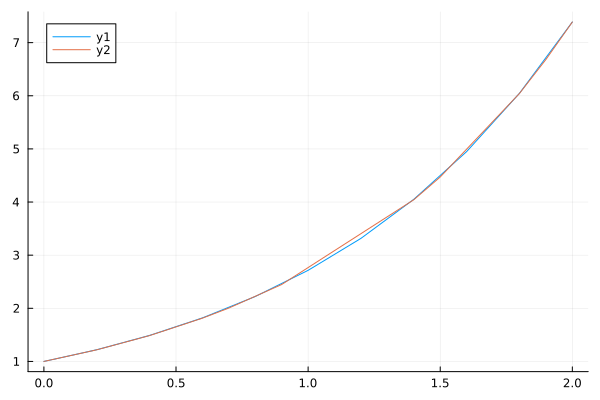

In [3]:
x = [0.0, 0.2, 0.4, 0.6, 0.7, 0.9, 1.4, 1.5, 1.8, 1.9, 2.0]


u1 = UBVP1D(2.0, 1.0, exp(2), 11)
u2 = BVP1D(2.0, 1.0, exp(2), x)

plot(LinRange(0,2,11), u1)
plot!(x,u2)

In [21]:
function uhat(x::Float64,u::Vector{Float64}, xs::Vector{Float64})
    #Evaluates the uhat function in x
    # u is the array of the approximated u values.
    # x is the value where we want to evaluate the function.
    idx = max(searchsortedfirst(xs, x) - 1, 1)

    h = xs[idx + 1] - xs[idx]
    N1 = (1 - (x - xs[idx])/h)
    N2 = (x - xs[idx])/h

    return u[idx]*N1 + u[idx + 1]*N2
end

function uhat(x::Vector{Float64}, u::Vector{Float64}, xs::Vector{Float64})
    return uhat.(x, Ref(u), Ref(xs))
end



uhat (generic function with 2 methods)

In [5]:
function ConvertionDegree(L,c,d,N)
    x = collect(LinRange(0,L,10000))
    errors = zeros(N-2)
    dist = zeros(N-2)
    for i=3:N
        M = i*N
        dist[i-2] = L/(M-1)
        us = UBVP1D(L, c, d, M)
        xs = collect(LinRange(0,L,M))
        uhats = uhat(x, us, xs)
 
        errors[i-2] = maximum(abs,uhats - exp.(x))
    end

    display(plot(dist[50:(N-3)], errors[50:(N-3)], xaxis=:log10, yaxis=:log10))

    p = fit(log10.(dist[50:(N-3)]), log10.(errors[50:(N-3)]), 1)[1]

    return p
end

ConvertionDegree (generic function with 1 method)

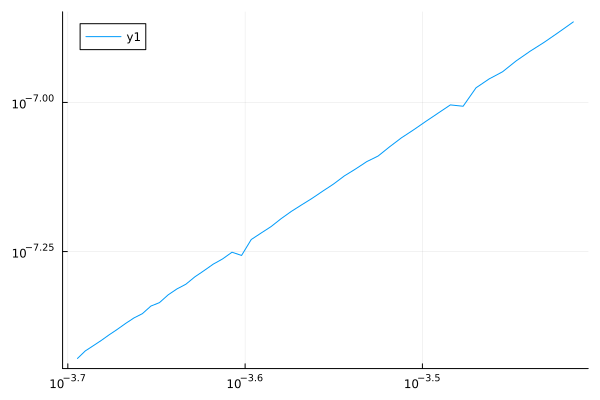

1.9985959715339099

In [6]:
p = ConvertionDegree(2.0, 1.0, exp(2), 100)

print(p)


# Exercise 1.5

## C

 ### d


[0.0, 0.00041815006634922944, 0.0008357164062228215, 0.001252698435017352, 0.001669095567544094, 0.0020849072180281402, 0.002500132800107963, 0.0029147717268347122, 0.0033288234106718644, 0.003742287263494345, 0.004155162696588174, 0.00456744912064968, 0.004979145945785059, 0.005390252581509582, 0.005800768436747511, 0.006210692919830693, 0.0066200254384988205, 0.007028765399898031, 0.007436912210581074, 0.007844465276506186, 0.008251424003036717, 0.008657787794940454, 0.00906355605638915, 0.009468728190957594, 0.009873303601623576, 0.010277281690766775, 0.010680661860168472, 0.01108344351101052, 0.011485626043875406, 0.0118872088587453, 0.012288191355001182, 0.01268857293142265, 0.013088352986187317, 0.013487530916869668, 0.013886106120441506, 0.014284077993270073, 0.014681445931118368, 0.015078209329144224, 0.015474367581899552, 0.015869920083330293, 0.01626486622677507, 0.016659205404965065, 0.017052937010023157, 0.017446060433463625, 0.01783857506619124, 0.018230480298500856, 0.018

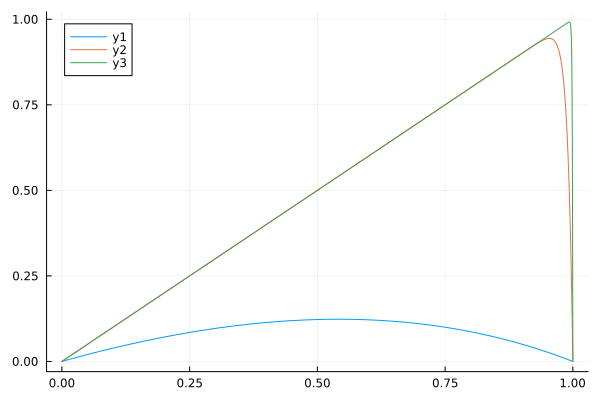

In [20]:

phi = 1

function u_a(x:: Vector{Float64}, epsilon::Float64) 
    return 1/phi .* (x .- (exp.((x.-1).*phi./epsilon) .- exp(-phi/epsilon))/(1 - exp(-phi/epsilon)))
end 

x = collect(range(0,1,1000))

epsilon = [1.0, 0.01, 0.001]

p = plot()
for i in 1:3
    print(u_a(x,epsilon[i]))
    plot!(x, u_a(x, epsilon[i]))
end
display(p)

### e

In [27]:
function LADE1D(L::Float64,c::Float64,d::Float64, epsilon:: Float64, psi, x::Vector{Float64})
    # Purpose: Solve second-order boundary value problem using FEM.
    # Author(s): Clara Hollenbeck
    # INPUT PARAMETERS
    # L : Domain length
    # c : Left boundary condition
    # d : Right boundary condition
    # x : 1D mesh vector x(1:{M})
    
    ## GLOBAL ASSEMBLY
    # Assemble A (the upper triangle only) and b. (Algorithm 1)
    M = length(x)
    A = spzeros(M,M)
    b = zeros(M)

    for i = 2:(M-1)
        h = L/(M-1)
        psi2 = psi/2
        epsh = epsilon/h

        k11 = psi2 + epsh
        k12 = psi2 - epsh
        k21 = -psi2 - epsh
        k22 = -psi2 + epsh

        A[i,i] += k11
        A[i, i+1] += k12
        A[i+1, i] += k21
        A[i+1,i+1] += k22
    end
    for i in 2:M-1
        b[i] = (x[i+1] - x[i-1]) / 2
    end
    # IMPOSE BOUNDARY CONDITIONS
    b[1] = c
    b[2] -= A[1,2]*c
    A[1,1] = 1
    A[1,2] = 0
    A[2,1] = 0

    b[M] = d
    b[M-1] -= A[M-1, M]*d
    A[M,M] = 1
    A[M-1,M] = 0
    A[M,M-1] = 0

    # SOLVE SYSTEM
    u = A\b

    return u
end

function ULADE1D(L,c,d,epsilon, psi,M)
    #Uniform version of the function above.
    x = LinRange(0,L,M)
    h = L/(M-1)
    A = spzeros(M,M)
    b = zeros(M)
    

    for i = 1:M-1
        h = L/(M-1)
        psi2 = psi/2
        epsh = epsilon/h

        k11 = psi2 + epsh
        k12 = psi2 - epsh
        k21 = -psi2 - epsh
        k22 = -psi2 + epsh

        A[i,i] += k11
        A[i, i+1] += k12
        A[i+1, i] += k21
        A[i+1,i+1] += k22

    end
    for i in 2:M-1
        b[i] = (x[i+1] - x[i-1]) / 2
    end
    
    # IMPOSE BOUNDARY CONDITIONS
    b[1] = c
    b[2] -= A[1,2]*c
    A[1,1] = 1
    A[1,2] = 0
    A[2,1] = 0
 
    b[M] = d
    b[M-1] -= A[M-1, M]*d
    A[M,M] = 1
    A[M-1,M] = 0
    A[M,M-1] = 0

    # SOLVE SYSTEM
    u = A\b

    return u
end


ULADE1D (generic function with 2 methods)

In [30]:
function ConvertionDegree_2(L, c, d, e, psi, N)
    x = collect(LinRange(0,L,10000))
    errors = zeros(N-2)
    dist = zeros(N-2)
    for i=3:N
        M = i*N
        dist[i-2] = L/(M-1)
        us = ULADE1D(L, c, d, e, psi, M)
        xs = collect(LinRange(0,L,M))
        uhats = uhat(x, us, xs)
 
        errors[i-2] = maximum(abs,uhats - u_a(x,e))
    end

    display(plot(dist, errors, xaxis=:log10, yaxis=:log10))

    p = fit(log10.(dist[50:(N-2)]), log10.(errors[50:(N-2)]), 1)[1]

    return p
end

ConvertionDegree_2 (generic function with 2 methods)

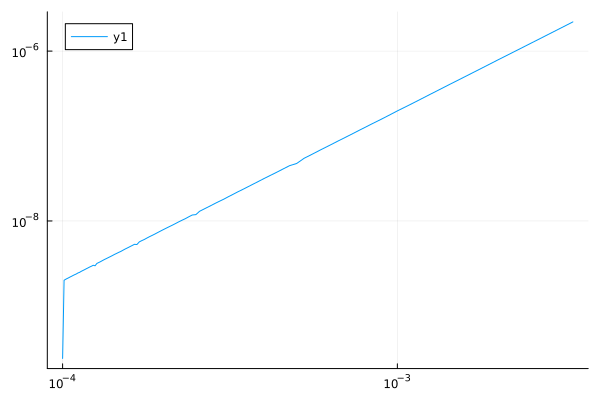

2.342472723787365

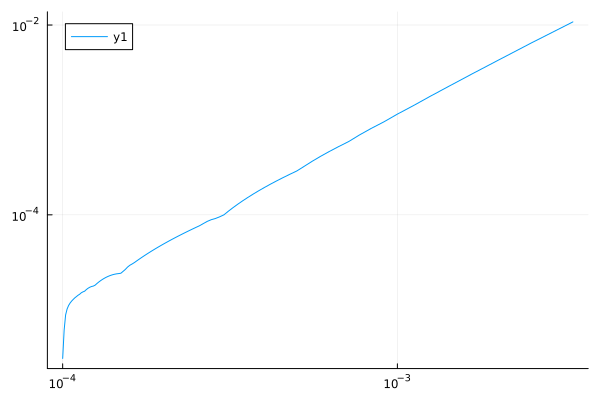

2.4937913059855297

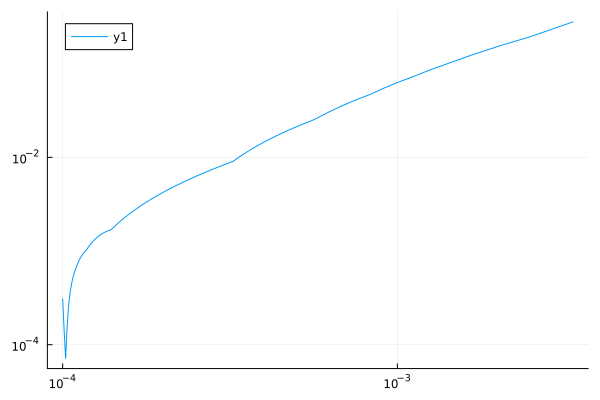

4.22779856233899

In [32]:
epsilon = [1.0, 0.01, 0.001]
psi = 1

for e in epsilon
    p = ConvertionDegree_2(1, 0, 0, e,psi, 100)
    print(p)
end




# Exercise 1.6

In [2]:
function fun(x)
    return exp(-800*(x-0.4)^2) + 0.25*exp(-40*(x-0.8)^2)
end

fun (generic function with 1 method)

In [3]:
function compute_error_decrease(fun::Function, VX::Vector{Float64}, EToV::Matrix{Int64})
    # Computes the decrease of error in the points in VX given a function func.
    M = length(VX)
    err = zeros(M-1)
    for i in 1:M-1
        h = VX[EToV[i , 2]]-VX[i]
        
        u1 = fun(VX[EToV[i , 1]] + h/2)
        u2 = fun(VX[EToV[i , 1]])
        u3 = fun(VX[EToV[i , 1]] + h)

        err[i] = (sqrt(3)*sqrt((h *(-2 * u1 + u2 + u3)^2)))/6
    end

    return err
end


compute_error_decrease (generic function with 1 method)

In [4]:
function refine_marked(EToVcoarse::Matrix{Int64}, xcoarse::Vector{Float64}, idxMarked::Vector{Int64})::Tuple{Matrix{Int64}, Vector{Float64}}
    M, N = size(EToVcoarse)
    K = length(idxMarked)

    EToVfine = zeros((M + K, N))
    xfine = zeros(length(xcoarse) + K)

    i = 1
    for j in 1:M
        xfine[j+i-1] = xcoarse[j]
        EToVfine[j+i-1, :] = [j+i-1, j+i]

        if i <= K && idxMarked[i] == j
            xfine[j+i] = (xcoarse[j+1] + xcoarse[j])/2
            EToVfine[j+i, :] = [j+i, j+i+1]
            i += 1
        end
    end

    xfine[end] = xcoarse[end]

    return EToVfine, xfine
end

refine_marked (generic function with 1 method)

In [10]:
function AMR(fun ::Function, a::Float64)
    VX = [0.0, 1.0]
    EToV = [1 2]
    tol = 10^(-4)

    iteration = 100

    for i in 1:iteration
        err = compute_error_decrease(fun, VX, EToV)
        idxMarked = findall(err .> a*tol)

        if isempty(idxMarked)
            break
        else
            EToV, VX = refine_marked(EToV, VX, idxMarked)
        end
    end
    return VX, EToV
end

    

AMR (generic function with 1 method)

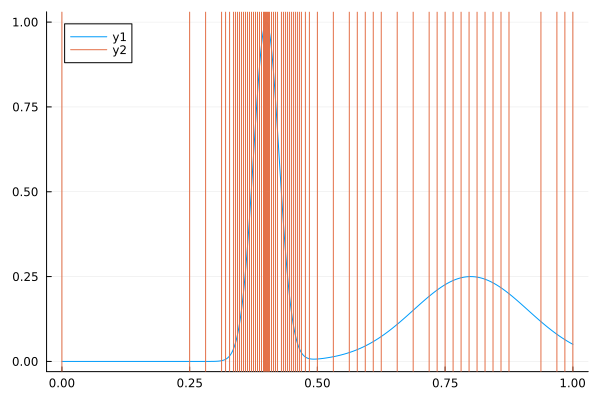

In [16]:
VX, EVoT = AMR(fun, 1.0)

x= collect(LinRange(0,1,1000))
p=plot(x, fun.(x))
vline!(VX)
display(p)